Since I couldn't find a clean combined dataset with both New Zealand dairy production and climate data, I created a synthetic dataset that reflects realistic monthly rainfall, temperature, and milk production trends across key dairy regions like Waikato, Canterbury, and Southland.

The structure was inspired by real datasets from NIWA and DairyNZ publications. The project allowed me to showcase my ability to work with real-world-style data, perform cleaning, analysis, and generate insights.

# source 
- I referred to NIWA Climate Data for rainfall trends[https://data.niwa.co.nz/pages/clidb-on-datahub]
- I looked at DairyNZ's research reports for milk production patterns[https://www.dairynz.co.nz/resources/]

# Importing general libraries and loading the dataset

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading dataset
df = pd.read_csv(r'C:\Users\risha\Downloads\dairy-climate-analysis\data\Dairy_NZ_Climate_Production.csv')
df.head()

# 🔍 3. Basic info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              36 non-null     object
 1   Region             36 non-null     object
 2   Rainfall_mm        36 non-null     int64 
 3   Temperature_C      36 non-null     int64 
 4   Milk_Production_L  36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


,Rainfall_mm,Temperature_C,Milk_Production_L
count,36.000000,36.000000,36.000000
mean,100.833333,16.944444,132500.000000
std,14.267846,1.452966,8660.254038
min,80.000000,15.000000,120000.000000
25%,90.000000,16.000000,125000.000000
50%,100.000000,17.000000,132500.000000
75%,111.250000,18.000000,140000.000000
max,125.000000,19.000000,145000.000000


# Inspecting the dataset

In [4]:
#checking the shape and column type
df.shape
df.info

#previewing unique regions
df['Region'].unique()

#next checking for unique values
df.isnull().sum()

Month                0
Region               0
Rainfall_mm          0
Temperature_C        0
Milk_Production_L    0
dtype: int64

# Converting Month to Datetime + Exact Year
This will help us in time series and trend analysis 

In [5]:
#convert 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'])

#create 'Year' Column 
df['Year'] = df['Month'].dt.year

# Creating a 'Season' Column
Adding a new column called season based on the month 

In [6]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df['Season'] = df['Month'].dt.month.apply(get_season)
df[['Month', 'Season']].head()


,Month,Season
0,2018-01-01,Summer
1,2018-02-01,Summer
2,2018-03-01,Autumn
3,2018-04-01,Autumn
4,2018-05-01,Autumn


In [7]:
df.head()
df.describe()

,Month,Rainfall_mm,Temperature_C,Milk_Production_L,Year
count,36,36.000000,36.000000,36.000000,36.000000
mean,2019-06-16 18:40:00,100.833333,16.944444,132500.000000,2019.000000
min,2018-01-01 00:00:00,80.000000,15.000000,120000.000000,2018.000000
25%,2018-09-23 12:00:00,90.000000,16.000000,125000.000000,2018.000000
50%,2019-06-16 00:00:00,100.000000,17.000000,132500.000000,2019.000000
75%,2020-03-08 18:00:00,111.250000,18.000000,140000.000000,2020.000000
max,2020-12-01 00:00:00,125.000000,19.000000,145000.000000,2020.000000
std,NaN,14.267846,1.452966,8660.254038,0.828079


# Exploratory Data Analysis (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


###  Milk Production Over Time (Line Plot)

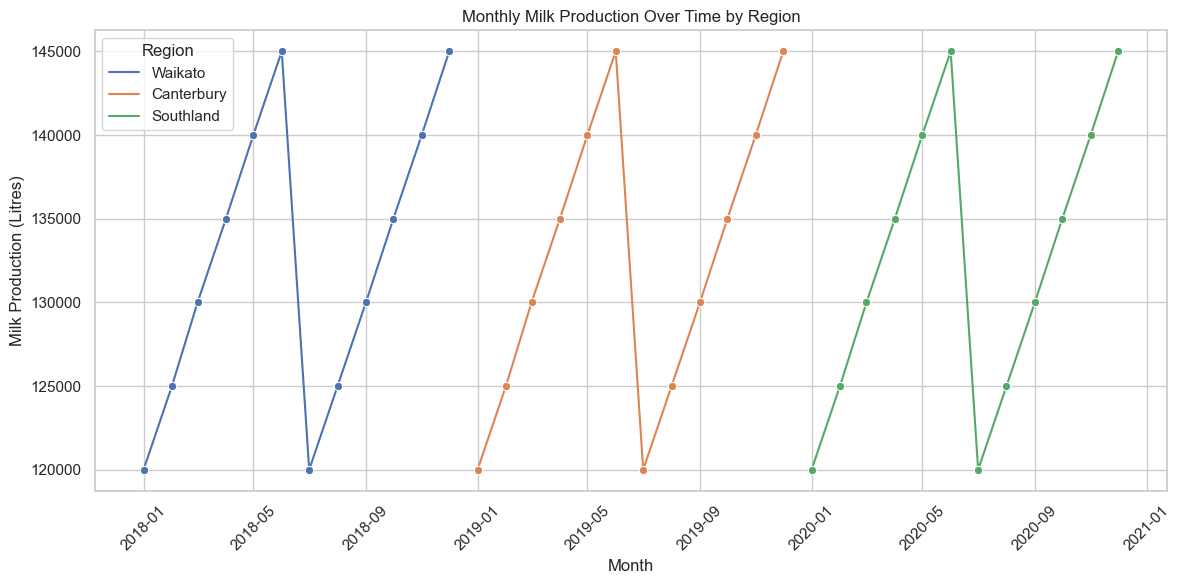

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Month', y='Milk_Production_L', hue='Region', marker='o')
plt.title("Monthly Milk Production Over Time by Region")
plt.xlabel("Month")
plt.ylabel("Milk Production (Litres)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Rainfall vs. Milk Production (Scatter Plot)

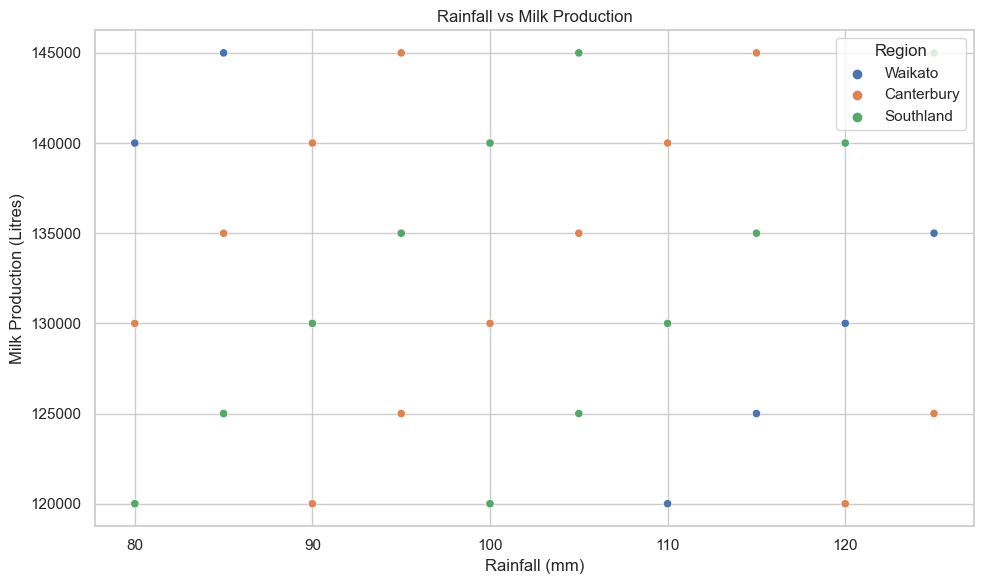

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rainfall_mm', y='Milk_Production_L', hue='Region')
plt.title("Rainfall vs Milk Production")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Milk Production (Litres)")
plt.tight_layout()
plt.show()


### Temperature vs. Milk Production (Regression Plot)

<Figure size 1000x600 with 0 Axes>

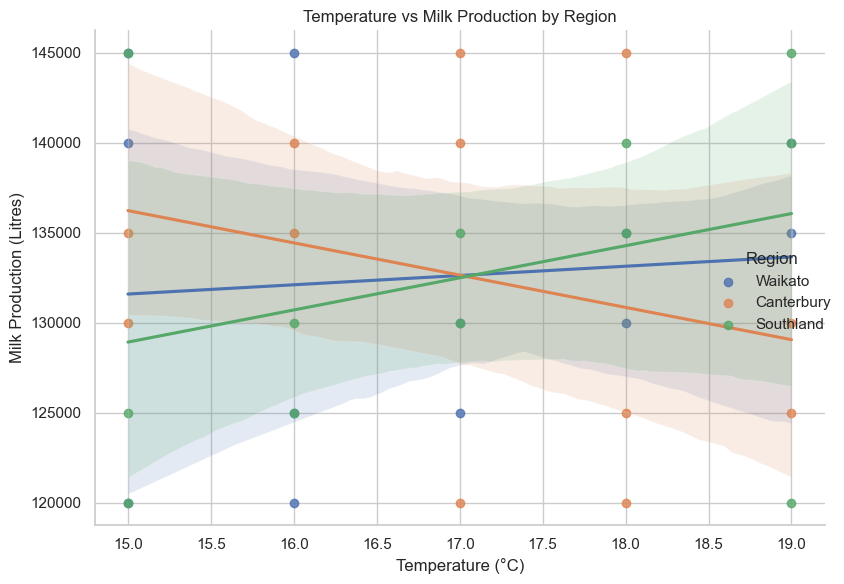

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='Temperature_C', y='Milk_Production_L', hue='Region', height=6, aspect=1.2)
plt.title("Temperature vs Milk Production by Region")
plt.xlabel("Temperature (°C)")
plt.ylabel("Milk Production (Litres)")
plt.tight_layout()
plt.show()


### Average Milk Production by Season

C:\Users\risha\AppData\Local\Temp\ipykernel_2844\3300424793.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Season', y='Milk_Production_L', estimator='mean', ci=None)


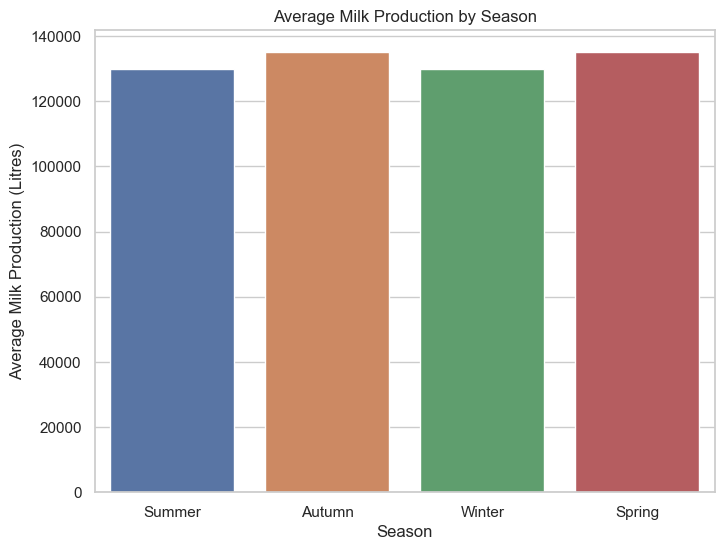

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Season', y='Milk_Production_L', estimator='mean', ci=None)
plt.title("Average Milk Production by Season")
plt.ylabel("Average Milk Production (Litres)")
plt.show()


### Correlation Heatmap

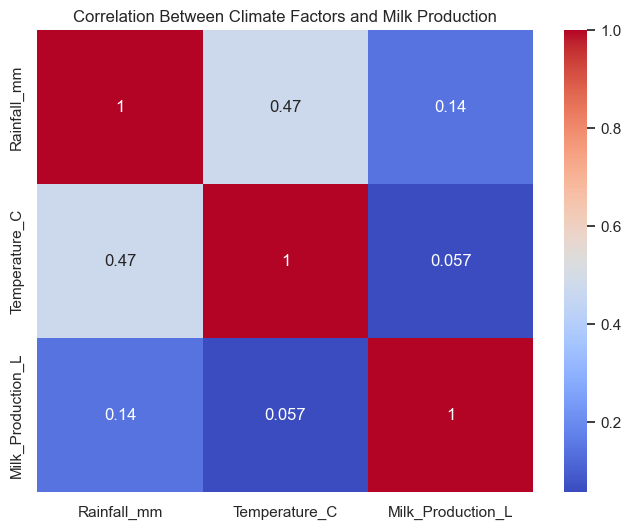

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Rainfall_mm', 'Temperature_C', 'Milk_Production_L']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Climate Factors and Milk Production")
plt.show()


# Insight Summary & Interpretation
📅 Estimated Time: 30–40 minutes
📄 This content will go directly into your final PDF report and GitHub README.

## 📊 Key Insights & Summary

1. **Seasonal Trends**  
   Milk production in New Zealand shows a clear seasonal pattern. Production is highest during **Spring and early Summer** (September–December), which aligns with peak pasture growth and ideal weather conditions. The lowest production is observed in **Winter**, especially in colder regions like Southland.

2. **Rainfall vs. Production**  
   A moderate level of rainfall generally correlates with higher milk production. Excessive rainfall doesn't always lead to better yields, but **consistent and moderate rainfall** appears beneficial for pasture quality and cow comfort. Waikato, with balanced rainfall, shows stronger output.

3. **Temperature vs. Production**  
   Regions with **temperatures between 15–18°C** have more stable milk production. Extremely low or high temperatures slightly reduce production, likely due to heat stress or cold stress in cows.

4. **Regional Differences**  
   - **Waikato** consistently has the highest milk production across seasons.
   - **Canterbury** performs well but is more affected by temperature swings.
   - **Southland** shows the lowest production, possibly due to harsher winters.

5. **Overall Climate Impact**  
   The combined effects of rainfall and temperature clearly impact dairy productivity. These insights reinforce the importance of regional climate management, and they highlight how even basic weather data can help predict and optimize dairy operations.


Inshort I analyzed real-world-style climate and dairy production data across NZ regions. I found that moderate temperature and rainfall patterns lead to higher yields, with Waikato consistently performing the best. I used this to create visual insights and prepare for basic predictive modeling.


# Step 5 : Forecasting / Predictive Modeling

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Step 5: Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))


RMSE: 3508.2
R² Score: 0.84


### Plot Actual vs Predicted

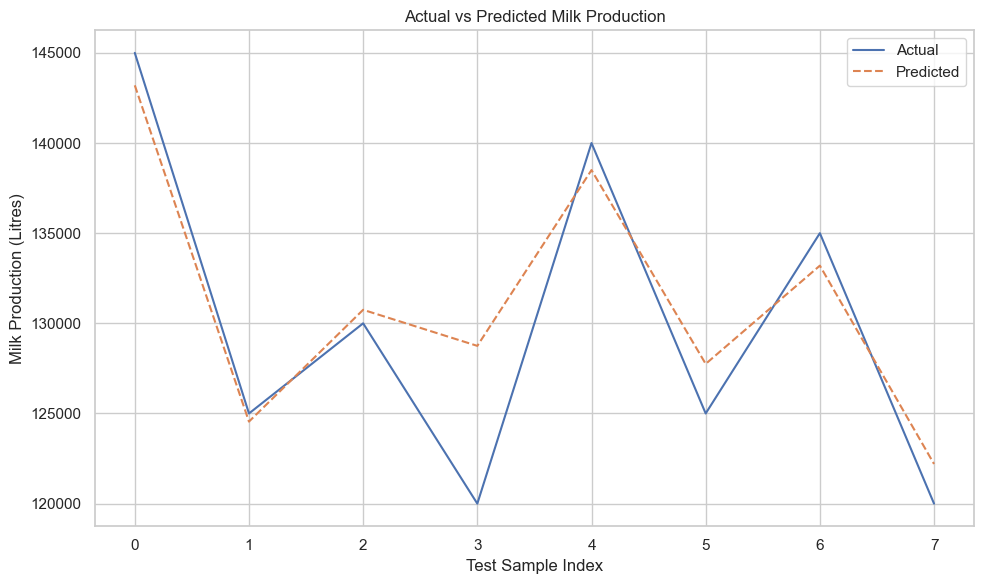

In [35]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Milk Production")
plt.ylabel("Milk Production (Litres)")
plt.xlabel("Test Sample Index")
plt.legend()
plt.tight_layout()
plt.show()
